In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split

C:\Users\Shoban_Ash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
ds=pd.read_csv('No-show-Issue-Comma-300k.csv')

In [4]:
ds.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
Age                        300000 non-null int64
Gender                     300000 non-null object
AppointmentRegistration    300000 non-null object
ApointmentData             300000 non-null object
DayOfTheWeek               300000 non-null object
Status                     300000 non-null object
Diabetes                   300000 non-null int64
Alcoolism                  300000 non-null int64
HiperTension               300000 non-null int64
Handcap                    300000 non-null int64
Smokes                     300000 non-null int64
Scholarship                300000 non-null int64
Tuberculosis               300000 non-null int64
Sms_Reminder               300000 non-null int64
AwaitingTime               300000 non-null int64
dtypes: int64(10), object(5)
memory usage: 34.3+ MB


In [6]:
ds.isnull().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
ApointmentData             0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alcoolism                  0
HiperTension               0
Handcap                    0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
dtype: int64

In [7]:
ds.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [8]:
ds['Age'].describe()

count    300000.000000
mean         37.808017
std          22.809014
min          -2.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         113.000000
Name: Age, dtype: float64

In [9]:
ds['Gender'].value_counts()

F    200505
M     99495
Name: Gender, dtype: int64

In [10]:
ds['Status'].value_counts()

Show-Up    209269
No-Show     90731
Name: Status, dtype: int64

In [11]:
ds['AwaitingTime'].describe()

count    300000.000000
mean        -13.841813
std          15.687697
min        -398.000000
25%         -20.000000
50%          -8.000000
75%          -4.000000
max          -1.000000
Name: AwaitingTime, dtype: float64

In [12]:
ds[ds['Smokes']==1]['Gender'].value_counts()

F    9289
M    6422
Name: Gender, dtype: int64

In [13]:
ds[ds['Age']==ds['Age'].min()]

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
272820,-2,F,2013-12-18T16:09:18Z,2014-01-07T00:00:00Z,Tuesday,No-Show,0,0,0,0,0,0,0,1,-20


In [14]:
ds.iloc[ds['Age'].idxmin()]

Age                                          -2
Gender                                        F
AppointmentRegistration    2013-12-18T16:09:18Z
ApointmentData             2014-01-07T00:00:00Z
DayOfTheWeek                            Tuesday
Status                                  No-Show
Diabetes                                      0
Alcoolism                                     0
HiperTension                                  0
Handcap                                       0
Smokes                                        0
Scholarship                                   0
Tuberculosis                                  0
Sms_Reminder                                  1
AwaitingTime                                -20
Name: 272820, dtype: object

In [15]:
ds.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [20]:
ds.rename(columns={'ApointmentData':'AppointmentData',
                   'Alcoolism':'Alchoholism',
                   'HiperTension':'Hypertension',
                   'Handcap':'Handicap'},inplace=True)

In [21]:
ds.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [22]:
ds['AppointmentRegistration']=ds.AppointmentRegistration.apply(np.datetime64)

In [25]:
ds.AppointmentData=ds.AppointmentData.apply(np.datetime64)

In [27]:
ds.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [28]:
ds.AwaitingTime=ds.AwaitingTime.apply(abs)

In [29]:
ds.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6


In [30]:
DaysToAppointment=ds.AppointmentData - ds.AppointmentRegistration

In [31]:
type(DaysToAppointment)

pandas.core.series.Series

In [32]:
ds.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6


In [35]:
ds.DaysToAppointment=ds.DaysToAppointment

In [38]:
DaysToAppointment.head()

0   28 days 09:13:35
1    0 days 16:58:34
2    0 days 11:06:14
3   14 days 06:57:49
4    5 days 08:39:51
dtype: timedelta64[ns]

In [39]:
DaysToAppointment=DaysToAppointment.apply(lambda x:x.total_seconds()/(3600*24))

In [40]:
DaysToAppointment.head()

0    28.384433
1     0.707338
2     0.462662
3    14.290150
4     5.361007
dtype: float64

In [41]:
60*60*24

86400

In [44]:
86400/60

1440.0

In [43]:
3600/60

60.0

In [45]:
24*60

1440

In [47]:
import seaborn as sns

In [51]:
sns.set_style('whitegrid')

Text(0,0.5,'Days to Appointment')

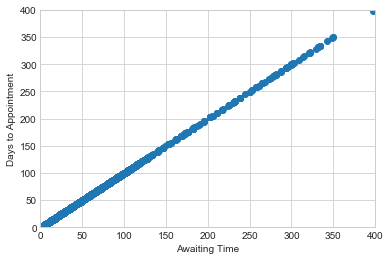

In [54]:
plt.scatter(ds.AwaitingTime,DaysToAppointment)
plt.axis([0,400,0,400])
plt.xlabel('Awaiting Time')
plt.ylabel('Days to Appointment')

In [55]:
ds.AppointmentRegistration.head()

0   2014-12-16 14:46:25
1   2015-08-18 07:01:26
2   2014-02-17 12:53:46
3   2014-07-23 17:02:11
4   2015-10-21 15:20:09
Name: AppointmentRegistration, dtype: datetime64[ns]

In [56]:
def calculatehoour(timestamp):
    timestamp=str(timestamp)
    hour=int(timestamp[11:13])
    minute=int(timestamp[14:16])
    second=int(timestamp[17:])
    return round(hour+minute/60+second/3600)

In [59]:
ds['HourOfTheDay']=ds.AppointmentRegistration.apply(calculatehoour)

In [60]:
ds.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,HourOfTheDay
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,15
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,7
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,13
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,17
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,15


In [62]:
ds.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime', 'HourOfTheDay'],
      dtype='object')

In [63]:
len(ds.columns)

16

Checking for error and NaN

In [68]:
print('Age: ',sorted(ds.Age.unique()))
print('Gender: ',ds.Gender.unique())
print('DayOfTheWeek: ',ds.DayOfTheWeek.unique())
print('Status: ',ds.Status.unique())
print('Diabetes: ',ds.Diabetes.unique())
print('Alchoholism: ',ds.Alchoholism.unique())
print('Hypertension: ',ds.Hypertension.unique())
print('Handicap: ',ds.Handicap.unique())
print('Smokes: ',ds.Smokes.unique())
print('Scholarship: ',ds.Scholarship.unique())
print('Tuberculosis: ',ds.Tuberculosis.unique())
print('Sms_remainder: ',ds.Sms_Reminder.unique())
print('AwaitingTime: ',sorted(ds.AwaitingTime.unique()))
print('HourOfTheDay: ',sorted(ds.HourOfTheDay.unique()))

Age:  [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 108, 113]
Gender:  ['M' 'F']
DayOfTheWeek:  ['Wednesday' 'Tuesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']
Status:  ['Show-Up' 'No-Show']
Diabetes:  [0 1]
Alchoholism:  [0 1]
Hypertension:  [0 1]
Handicap:  [0 1 2 3 4]
Smokes:  [0 1]
Scholarship:  [0 1]
Tuberculosis:  [0 1]
Sms_remainder:  [0 1 2]
AwaitingTime:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64

In [73]:
ds[(ds['Age']>=0) & (ds['Age']<=95)]

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,HourOfTheDay
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,15
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,7
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,13
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,17
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,15
5,5,F,2014-06-17 06:47:27,2014-07-22,Tuesday,No-Show,0,0,0,0,0,0,0,1,35,7
6,46,F,2015-06-19 19:53:58,2015-07-07,Tuesday,Show-Up,0,0,0,0,0,0,0,1,18,20
7,4,F,2015-08-07 08:19:19,2015-08-21,Friday,Show-Up,0,0,0,0,0,1,0,1,14,8
8,20,F,2014-10-14 11:46:36,2014-10-28,Tuesday,Show-Up,0,0,0,0,0,0,0,0,14,12
9,51,F,2014-06-13 07:50:43,2014-06-17,Tuesday,Show-Up,1,0,1,0,0,0,0,1,4,8


In [74]:
ds=ds[(ds['Age']>=0) & (ds['Age']<=95)]

In [75]:
ds.Age

0         19
1         24
2          4
3          5
4         38
5          5
6         46
7          4
8         20
9         51
10        33
11        58
12        62
13        62
14        38
15        73
16        48
17        52
18        64
19         1
20        33
21        44
22         5
23        69
24        16
25         8
26         7
27        51
28        29
29        59
          ..
299970    74
299971     9
299972    28
299973    47
299974    61
299975    13
299976    52
299977    46
299978    70
299979    42
299980     7
299981    56
299982    84
299983     4
299984     5
299985     0
299986    67
299987    73
299988    10
299989    56
299990    55
299991    46
299992    27
299993    49
299994    17
299995    41
299996    67
299997    48
299998     5
299999     0
Name: Age, Length: 299806, dtype: int64

In [76]:
ds.AwaitingTime.describe()

count    299806.000000
mean         13.840077
std          15.682083
min           1.000000
25%           4.000000
50%           8.000000
75%          20.000000
max         398.000000
Name: AwaitingTime, dtype: float64

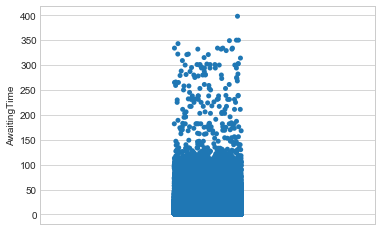

In [81]:
sns.stripplot(y='AwaitingTime',data=ds,jitter=True)
# sns.plt.ylim(0,500)

(0, 500)

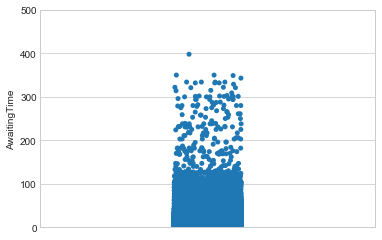

In [83]:
sns.stripplot(y='AwaitingTime',data=ds,jitter=True)
plt.ylim(0,500)

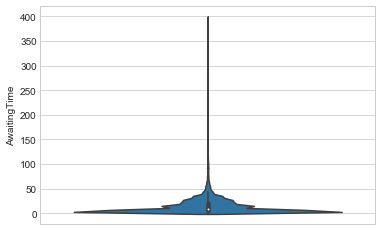

In [90]:
sns.violinplot(y='AwaitingTime',data=ds)

Conclusion :-
Clearly, the data starts to thin out after 150 days AwaitingTime. There is one observation at 398 days, which is likely an outlier. There are almost no observations beyond 350 days, so let us remove anything beyond 350 days which will include that 398 day observation too.

Remove outlier

In [93]:
ds= ds[ds.AwaitingTime<350]

Part 2 : EXPLORING THE DATA
Now we are all set to explore the different features of the data and determine how good a feature it is for prediction whether a patient is likely to show up at an appointment.

In [98]:
pd.crosstab(ds.Age,ds.Status).reset_index()

Status,Age,No-Show,Show-Up
0,0,2950,7376
1,1,1683,2852
2,2,965,1761
3,3,1034,1931
4,4,1112,2258
5,5,1254,2504
6,6,1286,2556
7,7,1341,2740
8,8,1249,2647
9,9,1217,2566


In [107]:
def probstatus(ds,groupby):
    df=pd.crosstab(index=ds[groupby],columns=ds.Status).reset_index()
    df['ProbShowup']=df['Show-Up'] / (df['Show-Up']+df['No-Show'])
    return df[[groupby,'ProbShowup']]

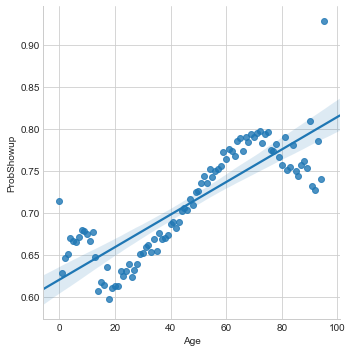

In [109]:
sns.lmplot(data=probstatus(ds,'Age'),x='Age',y='ProbShowup')

Text(0.5,1,'Probability of showing up with respect to Age')

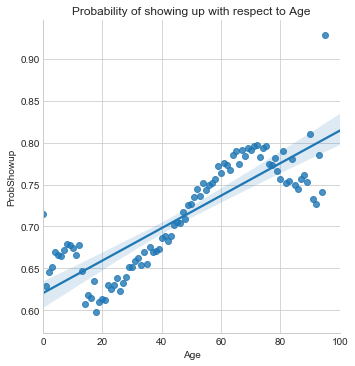

In [110]:
sns.lmplot(data=probstatus(ds,'Age'),x='Age',y='ProbShowup',fit_reg=True)
plt.xlim(0,100)
plt.title('Probability of showing up with respect to Age')

Text(0.5,1,'Probability of showing up with respect to HourOfTheDay')

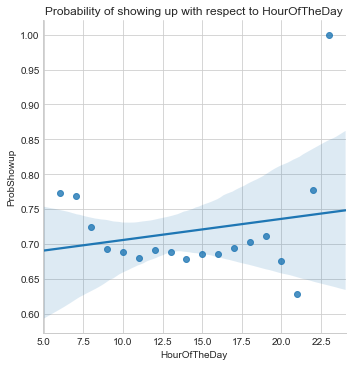

In [111]:
sns.lmplot(data=probstatus(ds,'HourOfTheDay'),x='HourOfTheDay',y='ProbShowup')
plt.title('Probability of showing up with respect to HourOfTheDay')

Text(0.5,1,'Probability of showing up with respect to AwaitingTime')

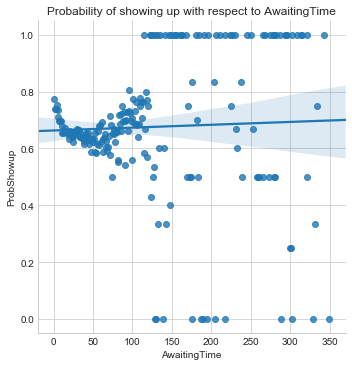

In [112]:
sns.lmplot(data=probstatus(ds,'AwaitingTime'),x='AwaitingTime',y='ProbShowup')
plt.title('Probability of showing up with respect to AwaitingTime')

Clearly, HourOfTheDay and AwaitingTime are not good predictors of Status, since the probability of showing up depends feebly on the HourOfTheDay and not at all on the AwaitingTime. The significantly stronger dependency is observed with respect to Age.

Next, we do the same analysis for the other variables except AppointmentRegistration and AppointmentData since we have already analyzed the probability of showing up with respect to HourOfTheDay and AwaitingTime.

## PART 3: PREDICTING WHETHER A PERSON WILL BE SHOWING UP

In this section I am going to try and predict the Show-Up/No-Show status based on the features which show the most variation in probability of showing up. They are:                                                                                           


1.Age
2.Diabetes
3.Alchoholism
4.Hypertension
5.Smokes
6.Scholarship
7.Tuberculosis

In [114]:
def daytonum(day):
    if day=='Monday':
        return 0
    if day=='Tuesday':
        return 1
    if day=='Wednesday':
        return 2
    if day=='Thursday':
        return 3
    if day=='Friday':
        return 4
    if day=='Saturday':
        return 5
    if day=='Sunday':
        return 6


In [115]:
ds.Gender = ds.Gender.apply(lambda x: 1 if x=='M' else 0)

In [117]:
ds.Gender.head()

0    1
1    0
2    0
3    1
4    1
Name: Gender, dtype: int64

In [118]:
ds.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,HourOfTheDay
0,19,1,2014-12-16 14:46:25,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,15
1,24,0,2015-08-18 07:01:26,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,7
2,4,0,2014-02-17 12:53:46,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,13
3,5,1,2014-07-23 17:02:11,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,17
4,38,1,2015-10-21 15:20:09,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,15


In [119]:
ds.DayOfTheWeek = ds.DayOfTheWeek.apply(daytonum)

In [120]:
ds.DayOfTheWeek.head()

0    2
1    2
2    1
3    3
4    1
Name: DayOfTheWeek, dtype: int64

In [121]:
ds.Status = ds.Status.apply(lambda x: 1 if x=='Show-Up' else 0)

In [123]:
ds.Status.tail()

299995    1
299996    1
299997    0
299998    1
299999    1
Name: Status, dtype: int64

Then, we split the data into training and testing data. After a lot of trial and error, I have found that about 296500 samples in the training data are most helpful to our classifier to properly get the best fit. Beyond that it overfits and below that it underfits. That is why I am using 296500 as sample size for our training data.

In [127]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299803 entries, 0 to 299999
Data columns (total 16 columns):
Age                        299803 non-null int64
Gender                     299803 non-null int64
AppointmentRegistration    299803 non-null datetime64[ns]
AppointmentData            299803 non-null datetime64[ns]
DayOfTheWeek               299803 non-null int64
Status                     299803 non-null int64
Diabetes                   299803 non-null int64
Alchoholism                299803 non-null int64
Hypertension               299803 non-null int64
Handicap                   299803 non-null int64
Smokes                     299803 non-null int64
Scholarship                299803 non-null int64
Tuberculosis               299803 non-null int64
Sms_Reminder               299803 non-null int64
AwaitingTime               299803 non-null int64
HourOfTheDay               299803 non-null int64
dtypes: datetime64[ns](2), int64(14)
memory usage: 48.9 MB


##### ds.columns

In [134]:
ds.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime', 'HourOfTheDay'],
      dtype='object')

In [131]:
299803 - 296500

3303

In [135]:
features_train = ds[['Age','Diabetes','Alchoholism','Hypertension','Smokes','Scholarship','Tuberculosis']].iloc[:296500]

labels_train = ds.Status.iloc[:296500]

In [136]:
features_test = ds[['Age','Diabetes','Alchoholism','Hypertension','Smokes','Scholarship','Tuberculosis']].iloc[296500:]

labels_test = ds.Status.iloc[296500:]

Since each feature in the training/testing sets contains a specific set of discrete values, i.e. Age contains integers from 0 to 95 and the other features are flags that contain only 0 or 1, I can safely assume that for Naive Bayes classification, P(x|y) follows a multinomial distribution. In that light, I will use the Multinomial Naive Bayes classifier to fit the data.

In [137]:
from sklearn.naive_bayes import MultinomialNB

In [138]:
from sklearn.naive_bayes import GaussianNB

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
gua_cls=GaussianNB()
gua_cls.fit(features_train,labels_train)

GaussianNB(priors=None)

In [141]:
y_pred = gua_cls.predict(features_test)

In [142]:
print('Accuracy: ',accuracy_score(labels_test,y_pred))

Accuracy:  0.6730245231607629


In [143]:
print('Accuracy: ',round(accuracy_score(labels_test,y_pred),2)*100,'%')

Accuracy:  67.0 %


In [144]:
gua_cls.score(features_train,labels_train)

0.665504215851602

In [146]:
gua_cls.score(features_test,labels_test)

0.6730245231607629

In [147]:
mul_cl=MultinomialNB()
mul_cl.fit(features_train,labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [148]:
y_pred2=mul_cl.predict(features_test)

In [153]:
accuracy_score(labels_test,y_pred2)

0.7099606418407508

In [149]:
print('Accuracy: ',round(accuracy_score(labels_test,y_pred2),2)*100,'%')

Accuracy:  71.0 %


In [151]:
mul_cl.score(features_train,labels_train)

0.6971635750421585

In [152]:
mul_cl.score(features_test,labels_test)

0.7099606418407508